In [1]:
import pandas as pd

In [2]:
# read CSV file directly from a URL and save the results, index column zero is the default anyway
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# primary object types are DataFrames (rows and columns) and Series (just columns)

In [5]:
data.tail()            # last rows of dataframe

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [6]:
data.shape

(200, 4)

In [7]:
# number of million dollars spent on tv radio newspaper on a specific market (index).
# sales is how many sales we had.
# dataset has 200 observations. Each one represents a market

In [8]:
import seaborn as sns

# allow plots to appear in the notebook
%matplotlib inline

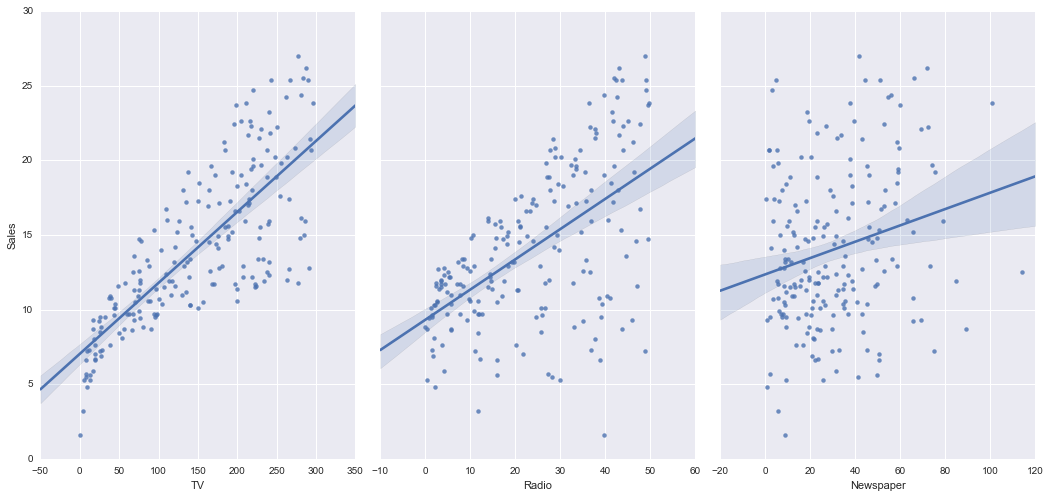

In [9]:
# visualize the relationship between our features (millions in adv) and responses (sales)
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=7, aspect= 0.7, kind='reg') # pairplot produces pairs
                # of scatter plots according to the data we pass into it
# kind='reg' plots the relationships, size and aspect change the size    

# we can see we have somewhat a linear relationship of TV ads and sales, a weaker relationship between radio ads and sales and a very weak relationship between newspaper ads and sales

# scikit-learn expects a feature matrix and a response vector in the format of NumPy arrays. Therefore, pandas is suitable to use. X (deature) can be a pandas DataFrame and Y (response) a pandas Series.

In [10]:
# so we first create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame

x = data[feature_cols]

# equivalent command of the above in one line

x = data[['TV', 'Radio', 'Newspaper']]

#print the first 5 rows
x.head()


,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [11]:
print type(x)
print x.shape

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [12]:
y = data['Sales']

y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [13]:
print type(y)
print y.shape

<class 'pandas.core.series.Series'>
(200L,)


In [14]:
# splitting x and y into training and testing sets
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [16]:
# we didn't specify the size of the testing set, so the default split is 75% training and
# 25% testing
print x_train.shape
print y_train.shape
print x_test.shape
print y_test.shape

(150, 3)
(150L,)
(50, 3)
(50L,)


In [17]:
# importing the model
from sklearn.linear_model import LinearRegression

# instantiate 
linreg= LinearRegression()

# fit the model to the training data (learning the intercept and coefficients for the line of best fit)
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# print the intercept and coefficients (ONLY FOR LINEAR REGRESSION)
print linreg.intercept_
print linreg.coef_

# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


[('TV', 0.046564567874150288),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.0034504647111803779)]

# The above numbers stand for this
# y = 2.88 + 0.0466 X TV + 0.179 X Radio + 0.00345 X Newspaper

# How do we interpret the TV coefficient (0.0466)?

# For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
# Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional 1,000 usd spent on TV ads is associated with an increase in sales of 46.6 items.

# Important notes:
# This is a statement of association, not causation.
# If an increase in TV ad spending was associated with a decrease in sales, $\beta_1$ would be negative.

In [22]:
# make predictions on the testing set

y_pred = linreg.predict(x_test)

In [23]:
y_pred

array([ 21.70910292,  16.41055243,   7.60955058,  17.80769552,
        18.6146359 ,  23.83573998,  16.32488681,  13.43225536,
         9.17173403,  17.333853  ,  14.44479482,   9.83511973,
        17.18797614,  16.73086831,  15.05529391,  15.61434433,
        12.42541574,  17.17716376,  11.08827566,  18.00537501,
         9.28438889,  12.98458458,   8.79950614,  10.42382499,
        11.3846456 ,  14.98082512,   9.78853268,  19.39643187,
        18.18099936,  17.12807566,  21.54670213,  14.69809481,
        16.24641438,  12.32114579,  19.92422501,  15.32498602,
        13.88726522,  10.03162255,  20.93105915,   7.44936831,
         3.64695761,   7.22020178,   5.9962782 ,  18.43381853,
         8.39408045,  14.08371047,  15.02195699,  20.35836418,
        20.57036347,  19.60636679])

# Model evaluation metrics for regression
 
 - Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

In [24]:
# define true and predicted response values
true = [100,50,30,20]
pred = [90,50,50,30]

Mean Absolute Error is the mean of the absolute value of errors

In [25]:
# calculate mean absolute error by hand (MAE)
print ((10 +0+20+10)/4)

10


In [27]:
# calculate mean absolute error (MAE) using the function from the metrics module
# of sklearn 

from sklearn import metrics
print (metrics.mean_absolute_error(true, pred))

10.0



Mean Squared Error (MSE) is the mean of the squared errors

In [28]:
# mean squared error is very similar to the mean absolute error
# calculate MSE by hand
print (10**2+ 0**2 + 20**2 + 10**2)/4

150


In [29]:
#calculate MSE using sklearn

print metrics.mean_squared_error(true, pred)

150.0


Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

In [30]:
# calculate RMSE by hand

import numpy as np
print np.sqrt((10**2 + 0**2 +20**2 +10**2)/4)

12.2474487139


In [31]:
# calculate RMSE using scikit-learn

print np.sqrt(metrics.mean_squared_error(true, pred))

12.2474487139


# Comparing these 3 metrics:

- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE 'punishes' larger errors.
- RMSE is even more popular than MSE, because RMSE is interpretable in the 'Y' 
 units

In [33]:
# So let's now calcularte the RMSE for our Sales predictions

print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


# Feature Selection

Let's try and see if the newspaper column 'belongs' in our model. Does it improve the quality of our predictions? We can do it by removing it from the feature_cols and calculating the RMSE and comparing it to the previous RMSE


In [34]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994


The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.